In [3]:
from bs4 import BeautifulSoup
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
# parse sample file
datapath = "./transcripts"
soup = BeautifulSoup(open(datapath+ 'example_ttml.xml'), 'html.parser')
result = [(p['begin'], p['end'], p.text) for p in soup.find_all('p')]

In [4]:
# parse a list of files into a python dictionary
datapath = "./transcripts/"
transcripts = {}

for file in os.listdir(datapath):
    if file.endswith(".xml"):
        soup = BeautifulSoup(open(datapath+ file), 'html.parser')
        result = [(p['begin'], p['end'], p.text) for p in soup.find_all('p')]
        transcripts[file] = result

load dict into pandas dataframe


In [47]:
transcripts.keys()

['EVhOBO0Ti3Y.xml',
 'XSQOCXwNqUA.xml',
 '31j_oEQe8jk.xml',
 'D4dacJrEAVE.xml',
 'hkxMirGeWaI.xml',
 'jpQI5skPJ2w.xml',
 'dAS4vBhTO6o.xml',
 'LqE0ANdOJ9U.xml',
 'BcY286asoaQ.xml',
 'A9UPmQFACEA.xml',
 'IHwHQI4MfgA.xml',
 'fjx49LtuSFY.xml',
 'Co7xBXwpzsM.xml',
 'nN3veIKCXIQ.xml',
 'Mv6kSadlgI0.xml',
 'BOL2YGm9Ayk.xml',
 'zjxGtP7-elU.xml',
 'ePoUs5ZgjB4.xml',
 '4HBJvsTI7RE.xml',
 'svMEO9wrud4.xml',
 'EPlFe-Zq2AU.xml',
 'OU42D3GJn_8.xml',
 'ulrLTCrHeeo.xml',
 'IrPwZ7ejsw8.xml',
 'T-REmilO5Z4.xml',
 'tWUQyahTt5w.xml',
 'sZnZMow20hk.xml',
 'Yz2zXy-SZFU.xml',
 'W8475PSmFgk.xml',
 'FWkRY9FZQM4.xml',
 'dPKC9KZi7QM.xml',
 'hzEPbJ1Zb0M.xml',
 'bmnyeMo-B3M.xml',
 '8JU7R1EOkh0.xml',
 'MshZX5jXeDg.xml',
 '19exy8rX5m8.xml',
 'mas0TMe25sg.xml',
 'hJEqvLAfBYs.xml',
 '7zxzHw3gsj4.xml',
 'pX27DCkpkY8.xml',
 'j1v2w9Z2B-4.xml',
 'McLo3_Hsr78.xml',
 'rD7ByPxRdNU.xml',
 'rPpmVv2e2kQ.xml',
 'H5T7iHSWcV8.xml',
 'ezVs975arf0.xml',
 '5Sw10A0-ntQ.xml',
 '68uGiX-DDH4.xml',
 'CHwZetuQadY.xml',
 'cGjCKfrH7J0.xml',


In [5]:
transcripts_pd = pd.DataFrame()
for transcript in sorted(transcripts)[:2]: #limit the list for convience/testing
    df2=pd.DataFrame(transcripts[transcript], columns = ['sTimestamp','eTimestamp','words'])
    #words dont always seemm to line up, consider rounding? 
    df2['sTime'] = pd.to_datetime(df2['sTimestamp']).dt.round('s').dt.strftime("%Hh%Mm%Ss")
    df2['videoId'] = transcript
    videoId_strip = transcript[:-4]
    df2['share_url'] = "https://youtu.be/" + videoId_strip + "?t=" + df2['sTime']
    transcripts_pd = transcripts_pd.append(df2)

In [6]:
transcripts_pd

,sTimestamp,eTimestamp,words,sTime,videoId,share_url
0,00:00:00.000,00:00:09.960,I have a night class in graph theory,00h00m00s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m00s
1,00:00:07.830,00:00:12.000,that I hate because it's a night class,00h00m08s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m08s
2,00:00:09.960,00:00:14.610,and it's filled with algorithms that are,00h00m10s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m10s
3,00:00:12.000,00:00:17.460,hard to pronounce but last week's class,00h00m12s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m12s
4,00:00:14.610,00:00:19.380,was particularly weird after the lecture,00h00m15s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m15s
5,00:00:17.460,00:00:21.539,the professor took questions from the,00h00m17s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m17s
6,00:00:19.380,00:00:23.100,class that weren't so much questions as,00h00m19s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m19s
7,00:00:21.539,00:00:24.960,they were long-winded commentary,00h00m22s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m22s
8,00:00:23.100,00:00:31.679,punctuated by question marks because the,00h00m23s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m23s
9,00:00:24.960,00:00:33.390,asker had an inflection but then the,00h00m25s,-Q9iAXpWxjA.xml,https://youtu.be/-Q9iAXpWxjA?t=00h00m25s


In [93]:
#text block
raw= ' '.join([x[2] for x in result])

In [94]:
# tokenzie and position tagging using nltk library
# http://www.nltk.org/book/ch05.html
# to understand the meaning of tags: nltk.help.upenn_tagset()
text = nltk.word_tokenize(raw)
postags= nltk.pos_tag(text)

LookupError: 
**********************************************************************
  Resource u'tokenizers/punkt/english.pickle' not found.  Please
  use the NLTK Downloader to obtain the resource:  >>>
  nltk.download()
  Searched in:
    - 'C:\\Users\\erica/nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - 'c:\\users\\erica\\miniconda3\\envs\\shareabouts\\nltk_data'
    - 'c:\\users\\erica\\miniconda3\\envs\\shareabouts\\lib\\nltk_data'
    - 'C:\\Users\\erica\\AppData\\Roaming\\nltk_data'
    - u''
**********************************************************************

In [5]:
# turn the result into dataframe for the convenience of processing
df = pd.DataFrame(postags,columns =['word','type'])

In [6]:
#filter words by type, only keeping nouns
typepattern_prefix=['NN']
mask = df.type.str.slice(0,2).isin(typepattern_prefix)
filtered=df[mask]

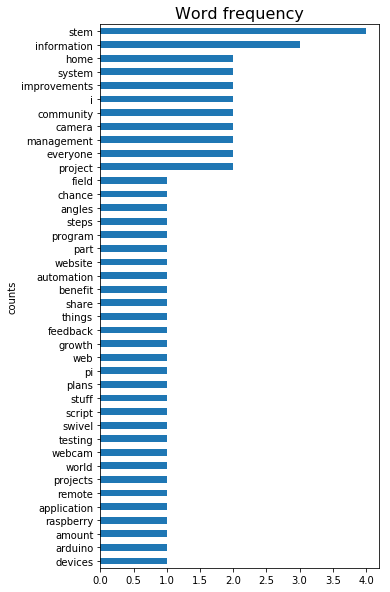

In [7]:
# plot word frequency
ax=filtered['word'].value_counts().sort_values(ascending=True).plot.barh(figsize=(5,10))
ax.set_ylabel('counts')
ax.set_title('Word frequency', fontsize=16)

## Analysis of speech speed on the video timeline

In [182]:
df2=pd.DataFrame(result, columns = ['sTimestamp','eTimestamp','words'])
df2['sTimestamp']=pd.to_datetime(df2['sTimestamp'])
df2['eTimestamp']=pd.to_datetime(df2['eTimestamp'])

In [88]:
from datetime import datetime, timedelta
transcripts_pd['durSeconds']= (transcripts_pd['eTimestamp']-transcripts_pd['sTimestamp'])/ timedelta(seconds=1)

In [89]:
transcripts_pd['wordcounts']=transcripts_pd.apply(lambda row: len(row['words'].split(' ')),axis='columns')

In [183]:
df2

,sTimestamp,eTimestamp,words
0,2017-08-28 00:00:05.000,2017-08-28 00:00:09.269,hi everyone I'm talking about a project
1,2017-08-28 00:00:07.319,2017-08-28 00:00:11.580,that I worked on called I have been
2,2017-08-28 00:00:09.269,2017-08-28 00:00:13.049,working on called gender Avenger that's
3,2017-08-28 00:00:11.580,2017-08-28 00:00:15.809,focused on measuring women's inclusion
4,2017-08-28 00:00:13.049,2017-08-28 00:00:17.550,in the public dialogue this is sort of
5,2017-08-28 00:00:15.809,2017-08-28 00:00:19.050,the information about gender Avenger the
6,2017-08-28 00:00:17.550,2017-08-28 00:00:20.880,mission is to build a community that
7,2017-08-28 00:00:19.050,2017-08-28 00:00:23.220,ensures women are represented in the
8,2017-08-28 00:00:20.880,2017-08-28 00:00:25.769,public dialogue it was started by
9,2017-08-28 00:00:23.220,2017-08-28 00:00:27.900,someone who friend of my Gina glance who


In [90]:
#fastest and slowest line by speech speed
transcripts_pd['speechSpeed']=transcripts_pd['wordcounts']/transcripts_pd['durSeconds']

vStart=min(df2['sTimestamp'])
transcripts_pd['offsetVideoStart'] = (transcripts_pd['sTimestamp']-vStart)/timedelta(seconds=1)

print('--------slowest spoken line:----------------')
print(transcripts_pd.sort_values(by=['speechSpeed']).iloc[0])
print('--------fastest spoken line:----------------')
print(transcripts_pd.sort_values(by=['speechSpeed']).iloc[-1])

--------slowest spoken line:----------------
sTimestamp          2017-08-28 00:16:02.400000
eTimestamp          2017-08-28 00:16:09.709000
words                             finally done
captionId                      -l7k2T1nvow.xml
durSeconds                               7.309
wordcounts                                   2
speechSpeed                           0.273635
offsetVideoStart                         962.4
Name: 437, dtype: object
--------fastest spoken line:----------------
sTimestamp                       2017-08-28 00:10:27.350000
eTimestamp                       2017-08-28 00:10:29.750000
words               might be fine for us to be given a pass
captionId                                   -l7k2T1nvow.xml
durSeconds                                              2.4
wordcounts                                               10
speechSpeed                                         4.16667
offsetVideoStart                                     627.35
Name: 286, dtype: object


KeyError: 'durSeconds'

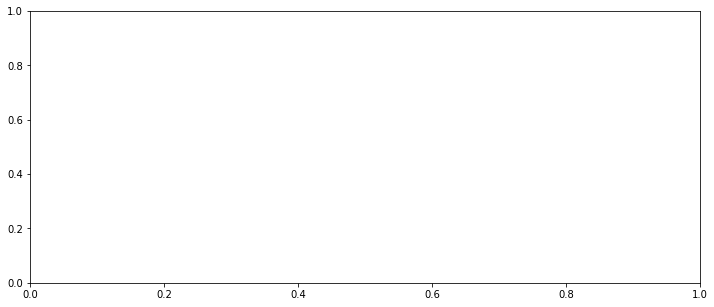

In [91]:
#fastest and slowest line by speech speed
fig=plt.figure(figsize=(12,5))
ax=fig.add_subplot(111)
df2['speechSpeed']=df2['wordcounts']/df2['durSeconds']

ax.plot(df2['offsetVideoStart'],df2['speechSpeed'],'--')
ax.set_ylabel('words / second')
ax.set_xlabel('time from the start of the video (seconds)')

ax.annotate('\"and I think that I could bring us a stem\"',
            xy=(43.45, 3.14465), xycoords='data',
            xytext=(-30, -20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top', size=14)

ax.annotate('\"information management\"',
            xy=(41.74, 0.551116), xycoords='data',
            xytext=(-30, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom', size=14)